In [1]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt 
import os  
import numpy as np 

In [2]:
files = os.listdir(r'E:\code\Machine Learning\data\uber-pickups-in-new-york-city')[-7:]


In [3]:
files.remove('uber-raw-data-janjune-15.csv')

In [4]:
files 

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [5]:
path = r"E:\code\Machine Learning\data\uber-pickups-in-new-york-city"
final = pd.DataFrame()

for file in files:
    df = pd.read_csv(path + '/' + file, encoding = 'utf-8', engine = "python")
    final = pd.concat([df, final])
    
    


In [6]:
final.shape

(4534327, 4)

In [7]:
df = final.copy()

In [8]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [9]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format = '%m/%d/%Y %H:%M:%S' )

In [10]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [11]:
df['Weekday'] = df['Date/Time'].dt.day_name()
df["Day"] = df['Date/Time'].dt.day 
df['Minute'] = df['Date/Time'].dt.minute 
df['Hour'] = df['Date/Time'].dt.hour
df['Month'] = df['Date/Time'].dt.month



In [12]:
df.head()

,Date/Time,Lat,Lon,Base,Weekday,Day,Minute,Hour,Month
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,0,9
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,0,9
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,0,9
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,0,9
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,0,9


In [13]:
import plotly.express as px

In [14]:
px.bar(x = df['Weekday'].value_counts().index, y = df['Weekday'].value_counts())

In [15]:
df['Month'].unique()

array([9, 5, 6, 7, 8, 4], dtype=int64)

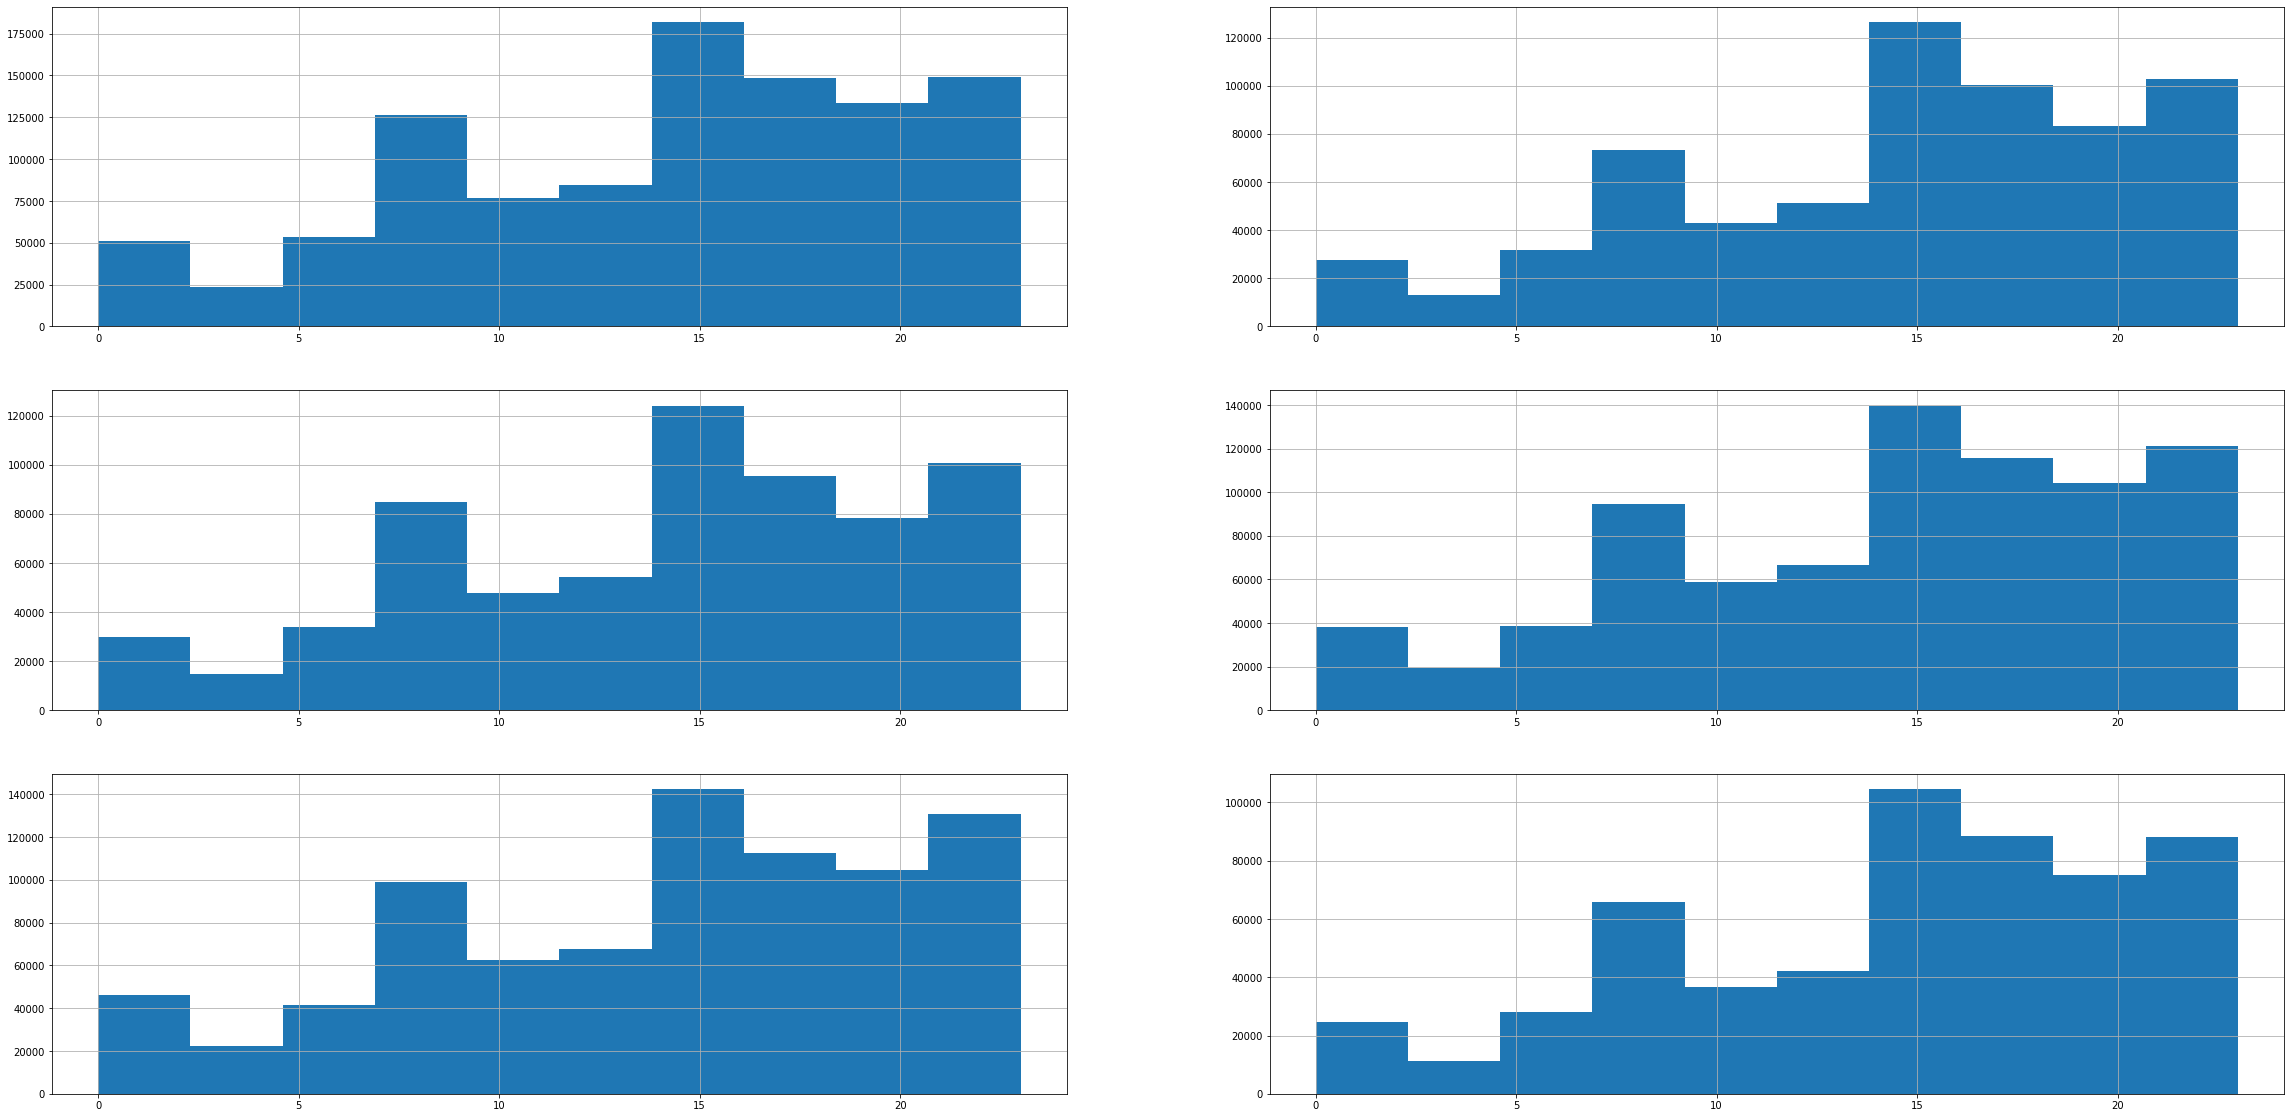

In [16]:
plt.figure(figsize = (40,20))
for i,month in enumerate(df['Month'].unique()):
    plt.subplot(3,2, i+1)
    df[df['Month']== month]['Hour'].hist()

In [17]:
import plotly.graph_objs as go
import chart_studio.plotly as py  
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot  

In [18]:
df.groupby(['Month'])['Hour'].count()

Month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: Hour, dtype: int64

Maximum Rides With Respect To Months

In [19]:
hrmnplot = go.Bar(
    x = df.groupby(['Month'])['Hour'].count().index,
    y= df.groupby(['Month'])['Hour'].count()
)


In [20]:
iplot([hrmnplot])


Number of rides by the day 

Text(0.5, 1.0, 'Journey By Month and Day')

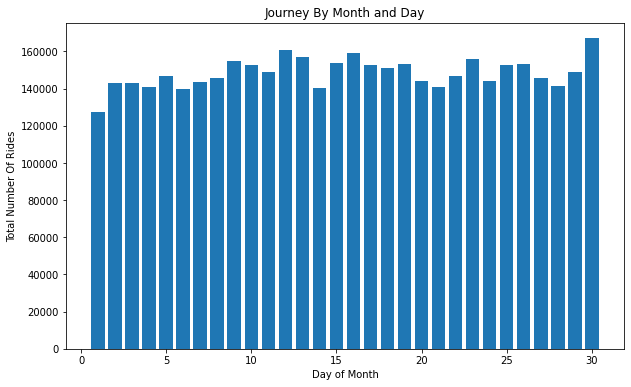

In [21]:
plt.figure(figsize = (10,6))
plt.hist(df['Day'], bins= 30, rwidth= 0.8, range = (0.5,30.5))
plt.xlabel('Day of Month')
plt.ylabel('Total Number Of Rides')
plt.title('Journey By Month and Day')

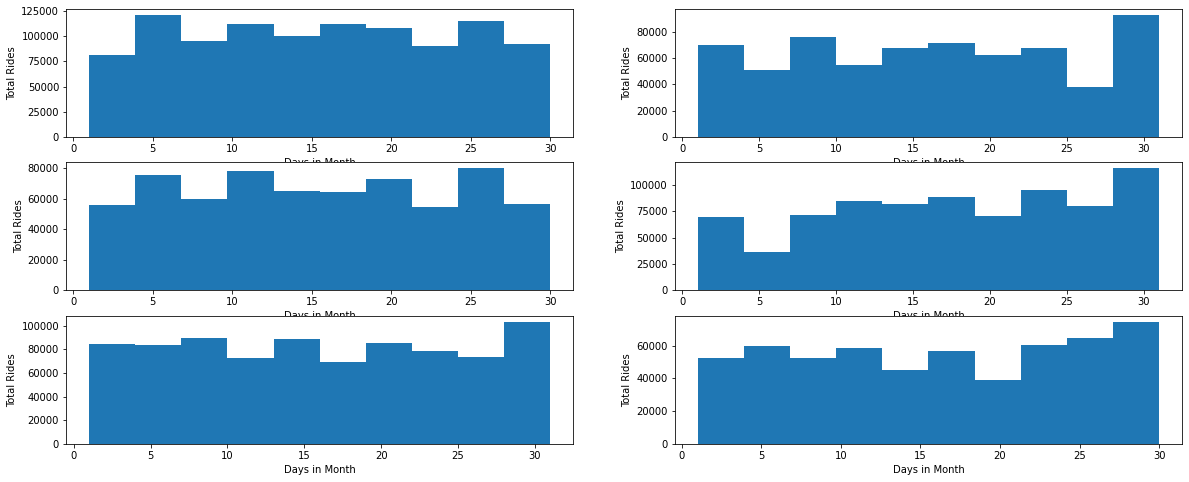

In [31]:
plt.figure(figsize = (20,8))
for i, month in enumerate(df['Month'].unique(), 1):
    plt.subplot(3,2,i)
    df_out = df[df['Month'] == month]
    plt.hist(df_out['Day'])
    plt.xlabel('Days in Month'.format(month))
    plt.ylabel('Total Rides')

<AxesSubplot:xlabel='Hour', ylabel='Lat'>

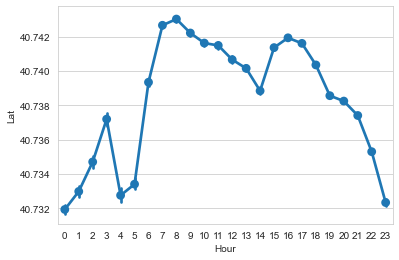

In [34]:
sns.set_style(style='whitegrid')
sns.pointplot(x="Hour", y="Lat", data=df)


Text(0.5, 1.0, 'Hours Of Day Vs The Latitude Of The Passengers')

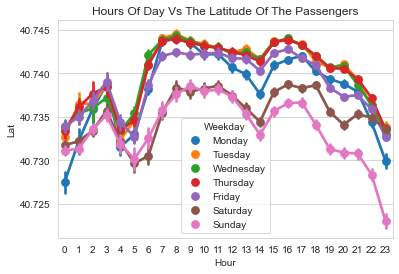

In [35]:
ax = sns.pointplot(data=df, x='Hour', y='Lat', hue='Weekday')
ax.set_title('Hours Of Day Vs The Latitude Of The Passengers')


In [23]:
base = df.groupby(['Base', 'Month'])['Date/Time'].count().reset_index()
base

,Base,Month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


<AxesSubplot:xlabel='Month', ylabel='Date/Time'>

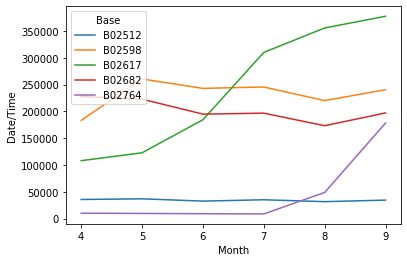

In [24]:
sns.lineplot(data = base, x = 'Month', y = 'Date/Time', hue = 'Base')

In [25]:
def count_rows(rows):
    return len(rows)

In [26]:
by_cross = df.groupby(["Weekday", "Hour"]).apply(count_rows)

In [27]:
pivot = by_cross.unstack()

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

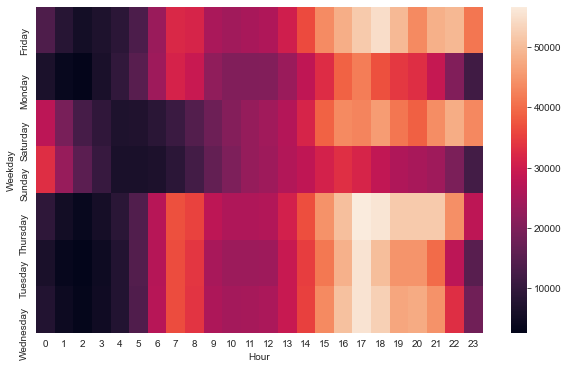

In [36]:
plt.figure(figsize = (10,6))
sns.heatmap(pivot)

In [37]:
def heatmap(col1, col2):
    by_cross = df.groupby([col1,col2]).apply(count_rows)
    pivot = by_cross.unstack()
    plt.figure(figsize = (10,6))
    return sns.heatmap(pivot)

<AxesSubplot:xlabel='Day', ylabel='Hour'>

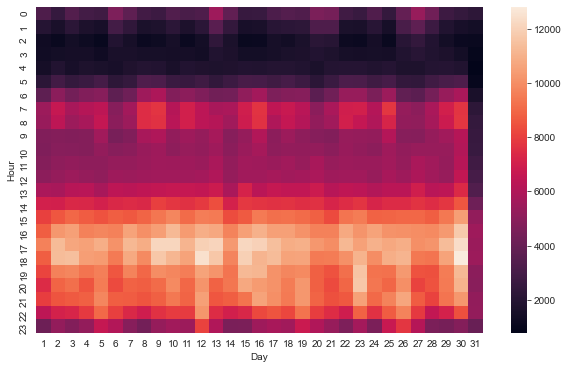

In [38]:
heatmap('Hour', 'Day')

<AxesSubplot:xlabel='Month', ylabel='Day'>

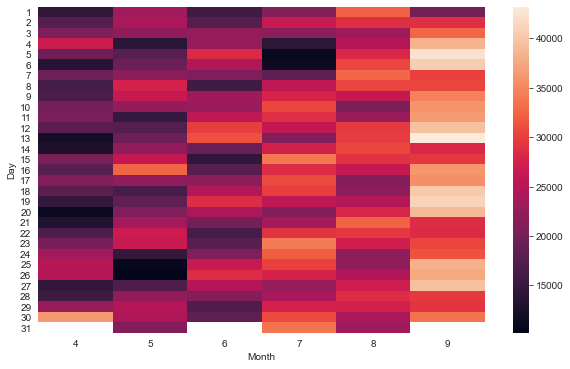

In [39]:
heatmap('Day', 'Month')

<AxesSubplot:xlabel='Month', ylabel='Weekday'>

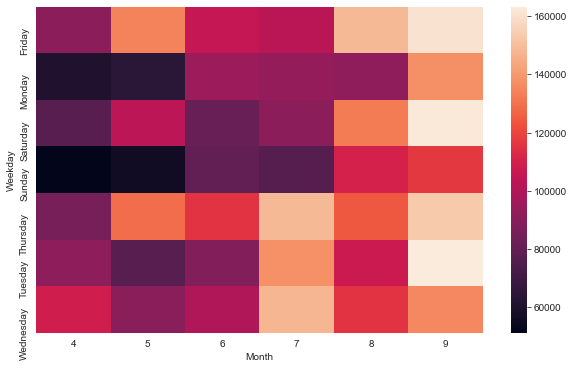

In [40]:
heatmap('Weekday', 'Month')

(40.6, 41.0)

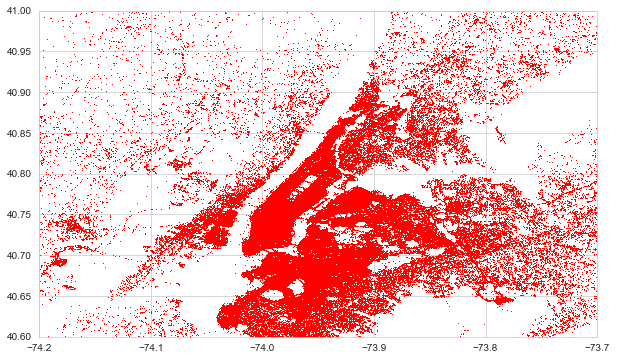

In [41]:
plt.figure(figsize=(10, 6))

plt.plot(df['Lon'], df['Lat'], 'r+', ms=0.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6, 41)


In [43]:
df_out = df[df['Weekday'] == 'Sunday']
df_out.head()


,Date/Time,Lat,Lon,Base,Weekday,Day,Minute,Hour,Month
8011,2014-09-07 00:00:00,40.7341,-74.0005,B02512,Sunday,7,0,0,9
8012,2014-09-07 00:00:00,40.7344,-73.9900,B02512,Sunday,7,0,0,9
8013,2014-09-07 00:00:00,40.7806,-73.9582,B02512,Sunday,7,0,0,9
8014,2014-09-07 00:01:00,40.7293,-73.9859,B02512,Sunday,7,1,0,9
8015,2014-09-07 00:01:00,40.7713,-74.0133,B02512,Sunday,7,1,0,9


In [47]:
rush_hour  = df_out.groupby(['Lat', 'Lon'])['Weekday'].count().reset_index()